Training Accuracy: 0.6849
Testing Accuracy: 0.6216
Testing Set Metrics:
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        14
         1.0       0.62      1.00      0.77        23

    accuracy                           0.62        37
   macro avg       0.31      0.50      0.38        37
weighted avg       0.39      0.62      0.48        37



C:\Users\Owner\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Owner\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Owner\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


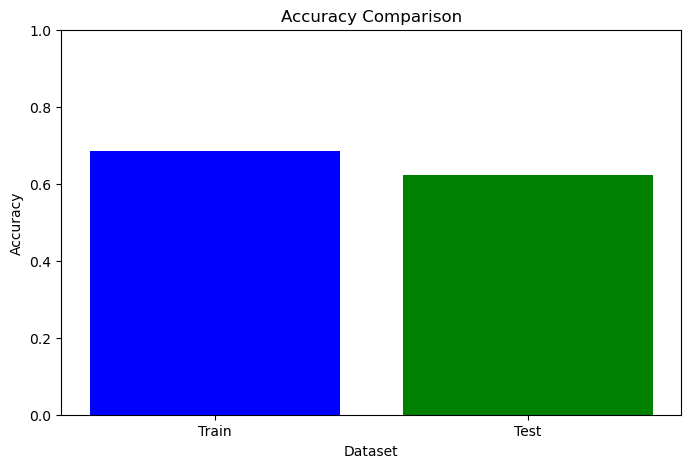

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd
import matplotlib.pyplot as plt


url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
titanic_df = pd.read_csv(url)


titanic_df.dropna(inplace=True) 
titanic_df.drop(['Name', 'Ticket', 'Cabin', 'PassengerId'], axis=1, inplace=True) 


titanic_df = pd.get_dummies(titanic_df, columns=['Sex', 'Embarked'], drop_first=True)


X = titanic_df.drop('Survived', axis=1)
y = titanic_df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)

# Define neural network architecture
class NeuralNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(X_train.shape[1], 5)  
        self.fc2 = nn.Linear(5, 3) 
        self.fc3 = nn.Linear(3, 1)  

    def forward(self, x):
        x = torch.relu(self.fc1(x))  
        x = torch.tanh(self.fc2(x))  
        x = torch.sigmoid(self.fc3(x)) 
        return x


model = NeuralNet()
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


epochs = 100
for epoch in range(epochs):
   
    optimizer.zero_grad()
    train_outputs = model(X_train_tensor)
    train_loss = criterion(train_outputs, y_train_tensor.view(-1, 1))  
    train_loss.backward()
    optimizer.step()



with torch.no_grad():
    train_outputs = model(X_train_tensor)
    train_predictions = torch.round(train_outputs).numpy().flatten()
    train_accuracy = accuracy_score(y_train_tensor.numpy(), train_predictions)

    test_outputs = model(X_test_tensor)
    test_predictions = torch.round(test_outputs).numpy().flatten()
    test_accuracy = accuracy_score(y_test_tensor.numpy(), test_predictions)

    print(f'Training Accuracy: {train_accuracy:.4f}')
    print(f'Testing Accuracy: {test_accuracy:.4f}')

    print("Testing Set Metrics:")
    print(classification_report(y_test_tensor.numpy(), test_predictions))
labels = ['Train', 'Test']
accuracy_scores = [train_accuracy, test_accuracy]

plt.figure(figsize=(8, 5))
plt.bar(labels, accuracy_scores, color=['blue', 'green'])
plt.title('Accuracy Comparison')
plt.xlabel('Dataset')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()